In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
inputs = df.drop('salary_more_then_100k' , axis='columns')
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [6]:
target = df['salary_more_then_100k']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In DecisionTree algorithm we use label encoding rather than onehot encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

Transform each input using **LabelEncoder.fit_transform** into new columns i.e **company_n , job_n , degree_n**

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


Now we don't need text columns so we drop them



In [11]:
inputs.drop(['company','job','degree'],axis='columns',inplace=True)
inputs.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(inputs, target)

DecisionTreeClassifier()

Predicting salary of computer programmer in google with bachelors degree <br>
Ans = [0] means Less than 100k

In [14]:
classifier.predict([[2,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [15]:
classifier.score(inputs,target)

1.0

## **Exercise** : Build decision tree model to predict survival based on certain parameters
In this file using following columns build a model to predict if person would survive or not,
1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model

In [17]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
inputs = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [20]:
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Label Encoding of the sex column

In [21]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

Transform input using LabelEncoder.fit_transform into new column i.e sex_n

In [23]:
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])
inputs.head()

,Pclass,Sex,Age,Fare,sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


Now we don't need sex column so we drop it

In [26]:
inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


Find Null values in all columns

In [33]:
inputs.isnull().sum()

Pclass      0
Age       177
Fare        0
sex_n       0
dtype: int64

# **Data Cleaning**
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

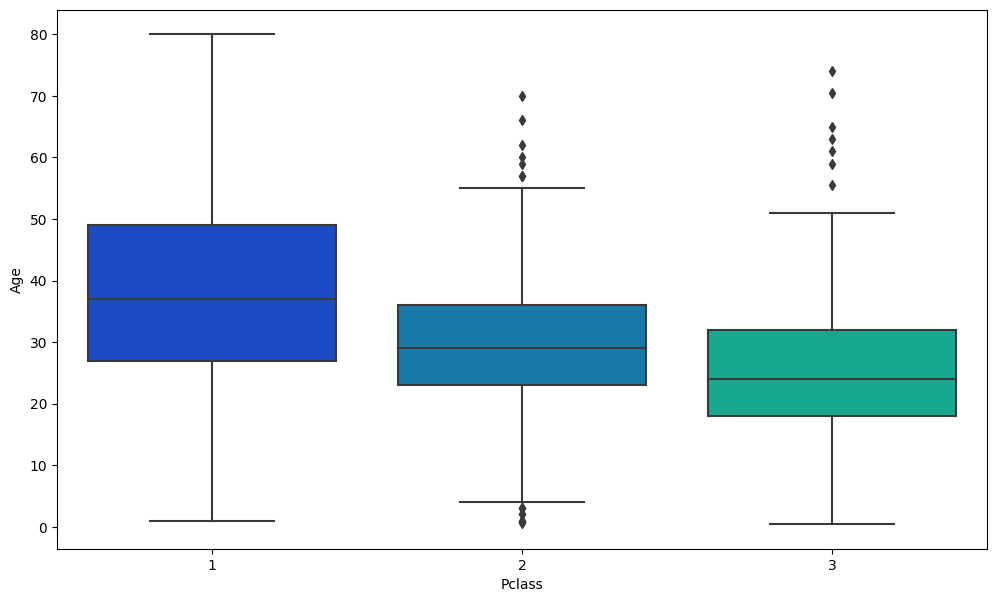

In [39]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=inputs,palette='winter') # Arguments are given in this format only

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [40]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [41]:
inputs['Age'] = inputs[['Age','Pclass']].apply(impute_age,axis=1)
inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [42]:
inputs.isnull().sum()

Pclass    0
Age       0
Fare      0
sex_n     0
dtype: int64

In [43]:
from sklearn.tree import DecisionTreeClassifier
titanic_model = DecisionTreeClassifier()
titanic_model.fit(inputs, target)

DecisionTreeClassifier()

In [44]:
titanic_model.score(inputs,target)

0.978675645342312